# Preprocess of Baththaramulla

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates

## Import Data

### 2019 - 2021

In [2]:
df1 = pd.read_excel("../Data/Data Battaramulla AQMS - 1 Hour - From 2019 to 2021 mid (with NOx).xlsx")

### 2022 - 2023

In [3]:
df2 = pd.read_excel("../Data/Data Battaramulla AQMS - 1 Hour - From 2022-10 Oct to 2023 End (with NOx).xlsx")

### 2024

In [4]:
df3 = pd.read_excel("../Data/Data Battaramulla AQMS - 1 Hour - For 2024 (with NOx).xlsx")

### Combined the Dataframes

In [5]:
df_combined = pd.concat([df1,df2,df3],ignore_index=True)

#### New dataframe info

In [6]:
df_combined.shape

(41640, 19)

In [7]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  41640 non-null  datetime64[ns]
 1   Period End Time    41640 non-null  datetime64[ns]
 2   AT                 21124 non-null  float64       
 3   RH                 33515 non-null  float64       
 4   BP                 33568 non-null  float64       
 5   Solar Rad          30791 non-null  float64       
 6   Rain Gauge         32973 non-null  float64       
 7   WS Raw             12601 non-null  float64       
 8   WD Raw             33575 non-null  float64       
 9   WS Average         12689 non-null  float64       
 10  WD Average         16732 non-null  float64       
 11  O3 Conc            25107 non-null  float64       
 12  CO Conc            20194 non-null  float64       
 13  NO Conc            31638 non-null  float64       
 14  NO2 Co

In [8]:
df_combined.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,41640,41640,21124.000000,33515.000000,33568.000000,30791.000000,32973.000000,12601.000000,33575.000000,12689.000000,16732.000000,25107.000000,20194.000000,31638.000000,31604.000000,31637.000000,28981.000000,29273.000000,24761.000000
mean,2021-12-20 06:11:17.496066560,2021-12-20 07:11:17.463976960,28.022401,73.932897,1009.850003,177.343337,0.350499,1.067352,176.827026,0.881259,166.046235,13.360517,519.657931,5.596364,10.127867,15.723119,7.528441,23.062481,36.132709
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,0.000000,55.100000,0.000000,0.000000,-1.930000,35.320000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-03-09 17:45:00,2020-03-09 18:45:00,25.700000,65.030000,1008.500000,0.280000,0.000000,0.300000,115.150000,0.200000,83.900000,4.640000,294.725000,0.650000,4.370000,6.070000,4.650000,10.000000,21.000000
50%,2021-05-17 11:30:00,2021-05-17 12:30:00,27.800000,75.530000,1009.800000,8.420000,0.000000,0.800000,189.000000,0.600000,199.600000,9.930000,426.000000,2.160000,7.940000,11.030000,6.250000,19.000000,31.000000
75%,2023-10-25 05:15:00,2023-10-25 06:15:00,30.400000,84.360000,1011.200000,342.825000,0.000000,1.700000,229.100000,1.400000,235.700000,17.890000,635.935000,6.130000,14.110000,20.990000,9.680000,32.000000,45.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,6.300000,300.100000,5.400000,360.000000,92.640000,4559.000000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.866367,12.246013,1.986292,244.890616,2.301753,0.899202,61.215875,0.792619,100.473561,11.966432,367.121060,9.095636,7.872557,14.577447,4.224653,17.174139,21.756105


## Duplicates

In [9]:
df_combined.duplicated().sum()

0

No duplicates there for we don't need to do anything about it 

## Null check

In [10]:
df_combined.isnull().sum()

Period Start Time        0
Period End Time          0
AT                   20516
RH                    8125
BP                    8072
Solar Rad            10849
Rain Gauge            8667
WS Raw               29039
WD Raw                8065
WS Average           28951
WD Average           24908
O3 Conc              16533
CO Conc              21446
NO Conc              10002
NO2 Conc             10036
NOx Conc             10003
SO2 Conc             12659
PM2.5 Conc           12367
PM10 Conc            16879
dtype: int64

Should we drop WS Raw, CO columns. They have null more than 50%. If we fill them with any methods, it just adds so much noise. I think it is better to drop them. What do you think? Let me know 

<function matplotlib.pyplot.show(close=None, block=None)>

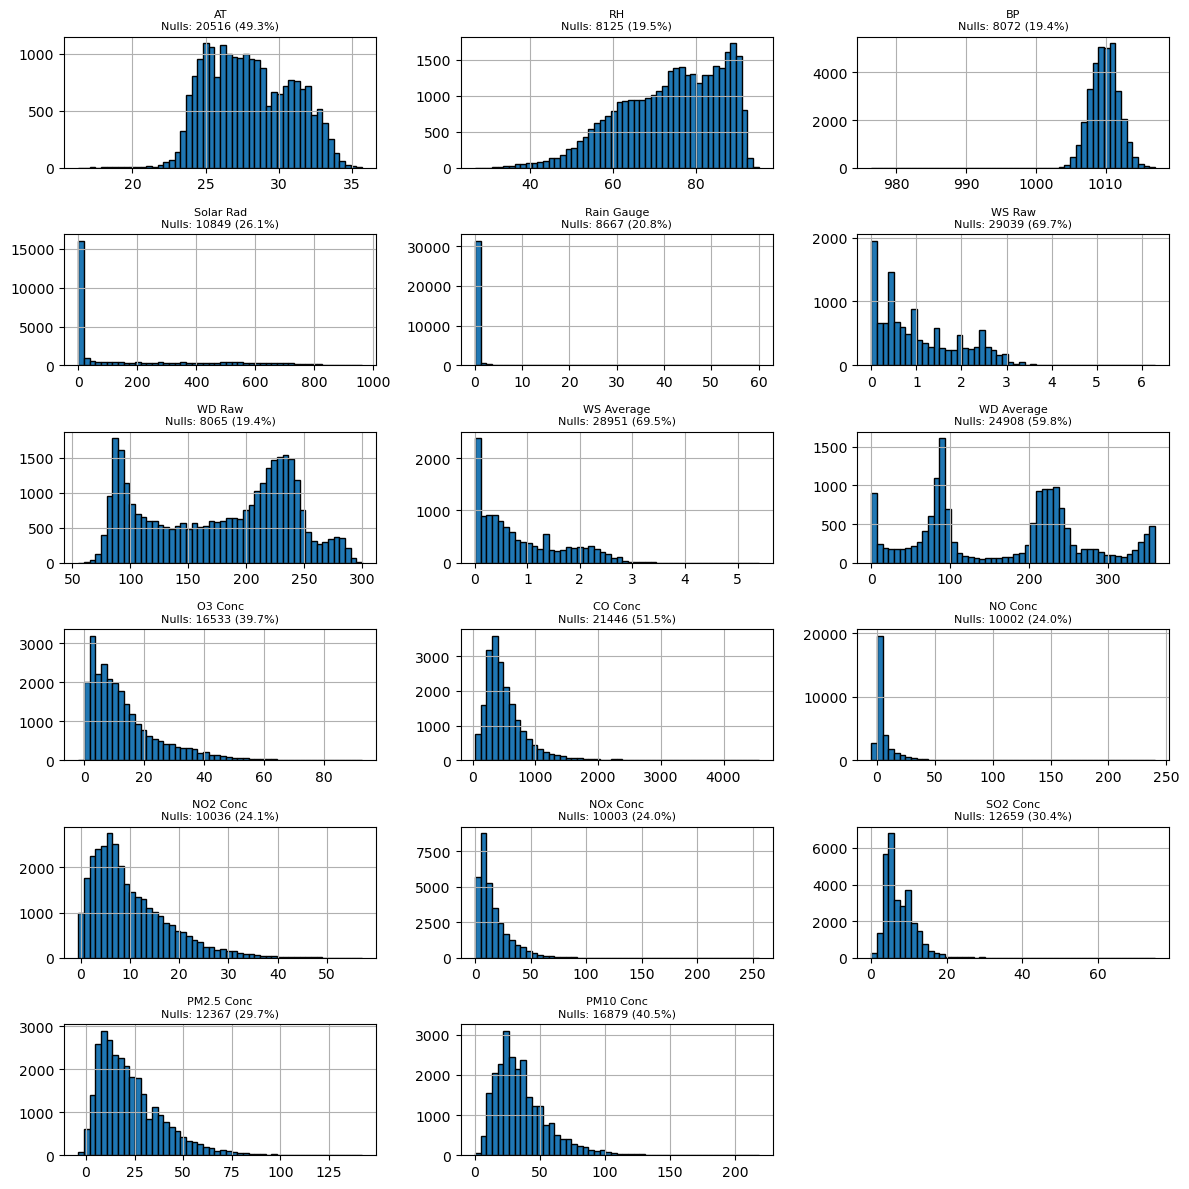

In [11]:
numeric_cols = [col for col in df_combined.columns if pd.api.types.is_numeric_dtype(df_combined[col])]

# Layout setup
n_cols = 3   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten()  # make it 1D for easy iteration

for i, col in enumerate(numeric_cols):
    df_combined[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_combined[col].isna().sum()} ({df_combined[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

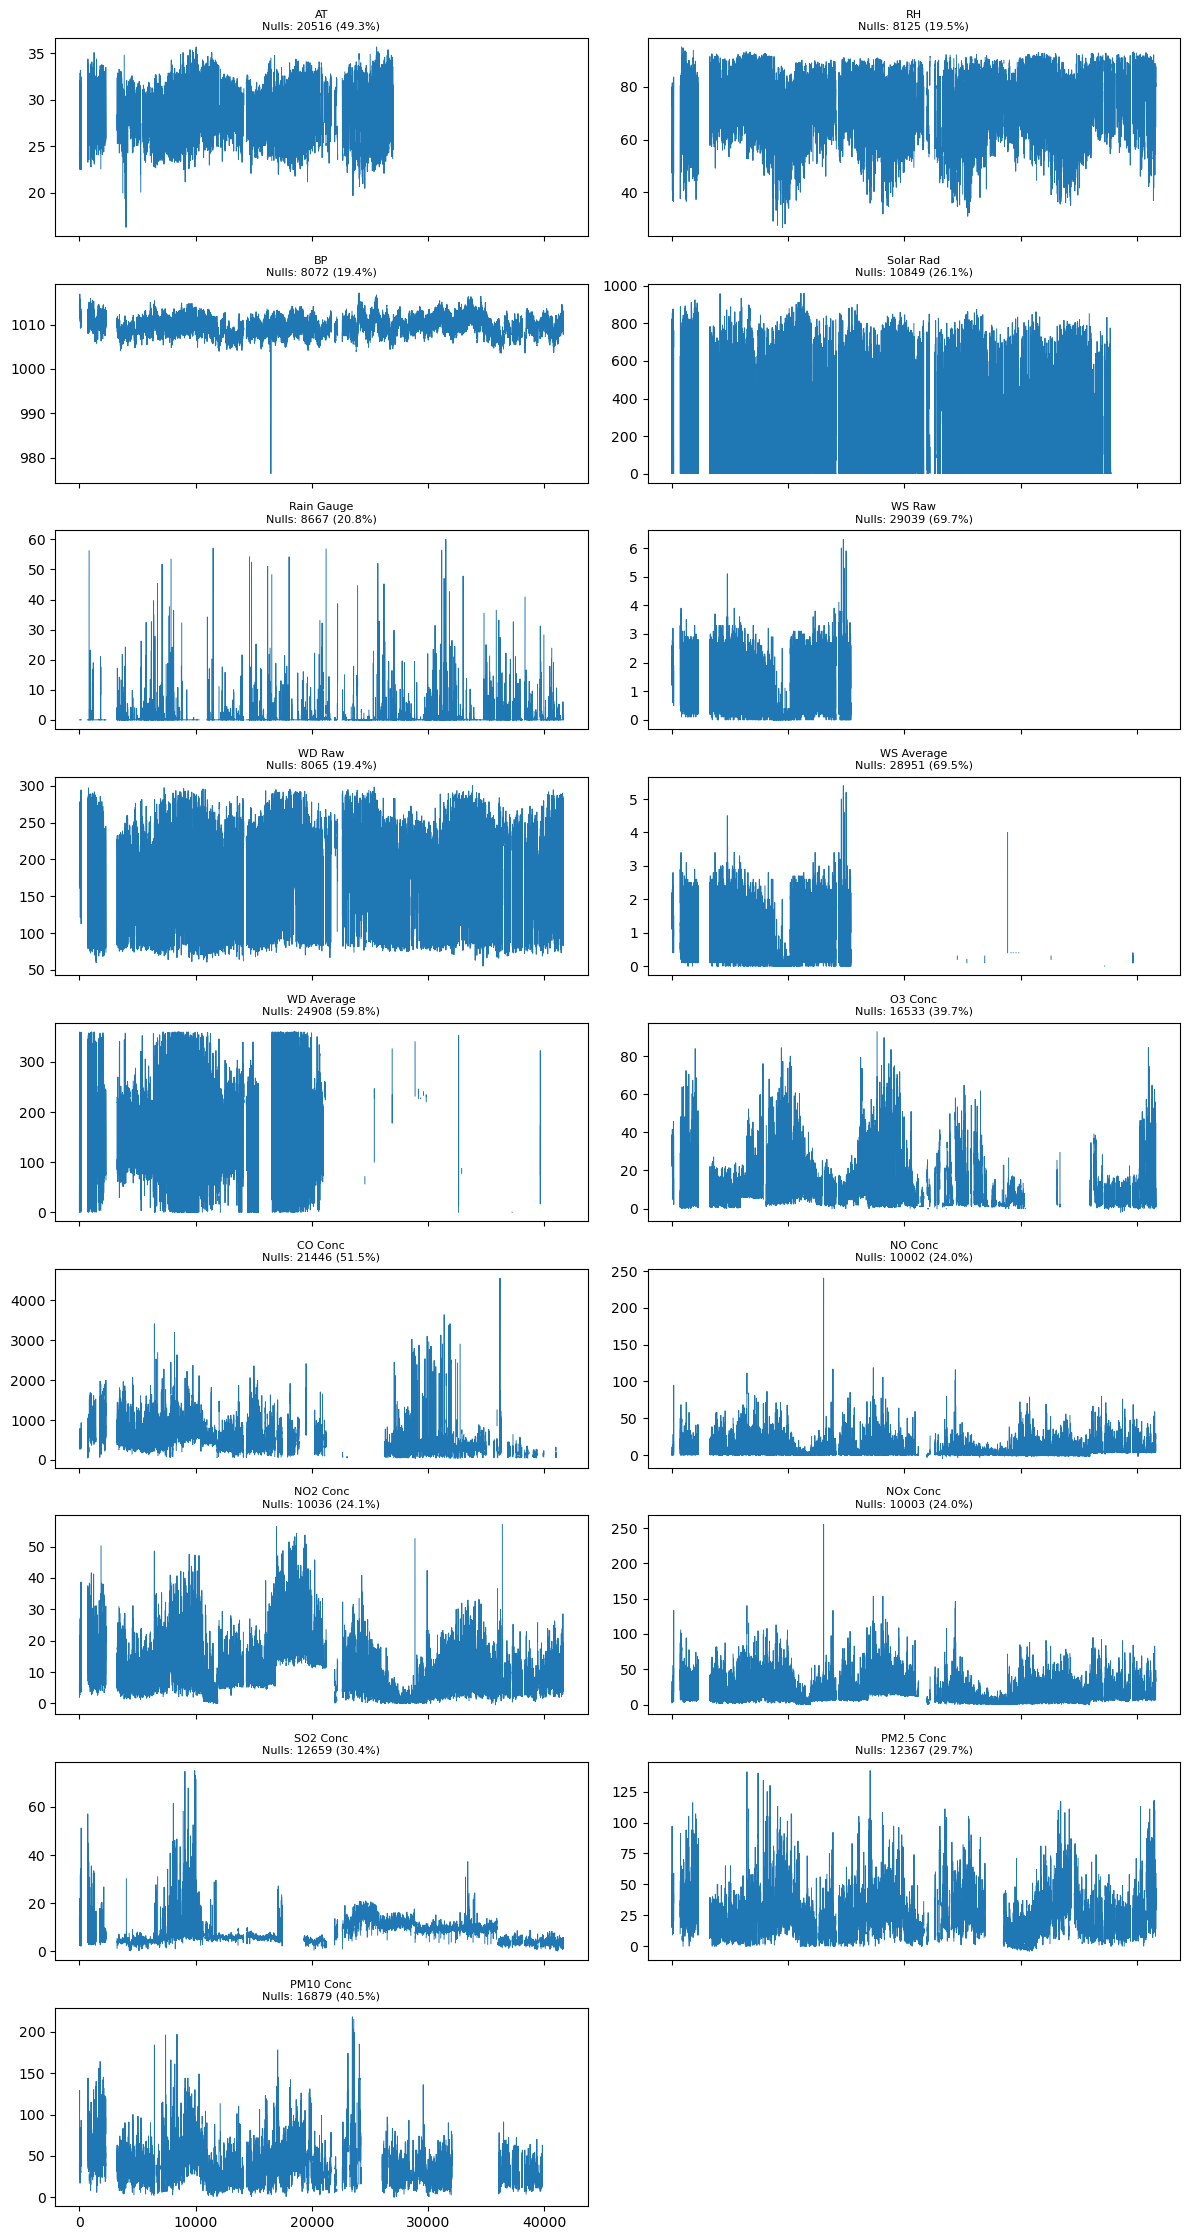

In [12]:
numeric_cols = [col for col in df_combined.columns if pd.api.types.is_numeric_dtype(df_combined[col])]

n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*2.5), sharex=True)
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].plot(df_combined.index, df_combined[col], linewidth=0.7)
    axes[i].set_title(f"{col}\nNulls: {df_combined[col].isna().sum()} ({df_combined[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Conclutions

1. We should drop WS Raw and CO 
<br> 
2. There is a large gap in data missing in 2021 - July to 2022 Oct. Filling this data is almost impossible. Even if we fill this, it introduces so much data (new 10800 records). If we were to fill that data, it doesn't even have any seasonality. Instead of doing this, we should split this gap or remove that gap. We can split the data one is 2019 to 2021 June other from 2022 November to 2024. I think this is the best way to do this
3. If we do the above method, null will be reduced, then we don't need to drop those columns. I have to check before doing it

## Cheack for the all null cloumn Data Gaps

In [13]:
# --- Step 1: Define your time and data columns ---
time_col = 'Period Start Time'
data_cols = [c for c in df_combined.columns if c != time_col and 'Time' not in c]

In [14]:
# --- Step 2: Sort and convert time column ---
df_combined[time_col] = pd.to_datetime(df_combined[time_col])
df_combined = df_combined.sort_values(time_col).reset_index(drop=True)

In [15]:
# --- Step 3: Create mask for rows where *all data columns* are null ---
null_mask = df_combined[data_cols].isna().all(axis=1)

In [16]:
# --- Step 4: Detect continuous null blocks ---
df_combined['null_block'] = (null_mask != null_mask.shift()).cumsum()
outage_blocks = []

In [17]:
for _, block in df_combined.groupby('null_block'):
    if block[data_cols].isna().all(axis=1).any():  # this block is an all-null block
        start_time = block[time_col].iloc[0]
        end_time = block[time_col].iloc[-1]
        num_rows = len(block)
        outage_blocks.append({'Start': start_time, 'End': end_time, 'Records': num_rows})

In [18]:
outage_df = pd.DataFrame(outage_blocks)
print(outage_df)
print(f"\nTotal outage periods detected: {len(outage_df)}")

                  Start                 End  Records
0   2019-01-05 01:00:00 2019-01-06 05:00:00       29
1   2019-01-07 13:00:00 2019-01-30 13:00:00      553
2   2019-02-01 04:00:00 2019-02-01 12:00:00        9
3   2019-02-04 19:00:00 2019-02-05 10:00:00       16
4   2019-02-05 14:00:00 2019-02-05 14:00:00        1
..                  ...                 ...      ...
290 2024-11-19 17:00:00 2024-11-20 10:00:00       18
291 2024-11-22 13:00:00 2024-11-25 08:00:00       68
292 2024-11-25 23:00:00 2024-11-25 23:00:00        1
293 2024-11-29 19:00:00 2024-11-29 19:00:00        1
294 2024-12-18 15:00:00 2024-12-20 16:00:00       50

[295 rows x 3 columns]

Total outage periods detected: 295


In [19]:
outage_df[outage_df['Records'] < 100]

,Start,End,Records
0,2019-01-05 01:00:00,2019-01-06 05:00:00,29
2,2019-02-01 04:00:00,2019-02-01 12:00:00,9
3,2019-02-04 19:00:00,2019-02-05 10:00:00,16
4,2019-02-05 14:00:00,2019-02-05 14:00:00,1
5,2019-03-18 19:00:00,2019-03-19 11:00:00,17
...,...,...,...
290,2024-11-19 17:00:00,2024-11-20 10:00:00,18
291,2024-11-22 13:00:00,2024-11-25 08:00:00,68
292,2024-11-25 23:00:00,2024-11-25 23:00:00,1
293,2024-11-29 19:00:00,2024-11-29 19:00:00,1


In [20]:
outage_df[outage_df['Records'] > 100]

,Start,End,Records
1,2019-01-07 13:00:00,2019-01-30 13:00:00,553
8,2019-04-06 04:00:00,2019-05-15 11:00:00,944
48,2020-08-13 17:00:00,2020-08-21 10:00:00,186
69,2021-05-23 16:00:00,2021-05-28 07:00:00,112
72,2021-06-22 06:00:00,2022-10-03 08:00:00,267
80,2022-10-14 18:00:00,2022-10-31 10:00:00,401
81,2022-11-03 17:00:00,2022-11-08 09:00:00,113
265,2024-06-25 06:00:00,2024-07-01 10:00:00,149
272,2024-08-07 11:00:00,2024-08-14 13:00:00,171
279,2024-10-02 04:00:00,2024-10-09 13:00:00,178


Let's remove all the data gaps that have more than 100 records (4 days)

In [21]:
# Drop long outages (>100 records)
for _, row in outage_df[outage_df['Records'] > 100].iterrows():
    start, end = row['Start'], row['End']
    df_combined = df_combined[~((df_combined['Period Start Time'] >= start) & (df_combined['Period Start Time'] <= end))]

In [22]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38566 entries, 0 to 41639
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  38566 non-null  datetime64[ns]
 1   Period End Time    38566 non-null  datetime64[ns]
 2   AT                 21124 non-null  float64       
 3   RH                 33515 non-null  float64       
 4   BP                 33568 non-null  float64       
 5   Solar Rad          30791 non-null  float64       
 6   Rain Gauge         32973 non-null  float64       
 7   WS Raw             12601 non-null  float64       
 8   WD Raw             33575 non-null  float64       
 9   WS Average         12689 non-null  float64       
 10  WD Average         16732 non-null  float64       
 11  O3 Conc            25107 non-null  float64       
 12  CO Conc            20194 non-null  float64       
 13  NO Conc            31638 non-null  float64       
 14  NO2 Conc   

In [23]:
df_combined.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WS Raw,WD Raw,WS Average,WD Average,O3 Conc,CO Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc,null_block
count,38566,38566,21124.000000,33515.000000,33568.000000,30791.000000,32973.000000,12601.000000,33575.000000,12689.000000,16732.000000,25107.000000,20194.000000,31638.000000,31604.000000,31637.000000,28981.000000,29273.000000,24761.000000,38566.000000
mean,2022-01-15 02:31:13.218280704,2022-01-15 03:31:13.183633408,28.022401,73.932897,1009.850003,177.343337,0.350499,1.067352,176.827026,0.881259,166.046235,13.360517,519.657931,5.596364,10.127867,15.723119,7.528441,23.062481,36.132709,245.993699
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,0.000000,55.100000,0.000000,0.000000,-1.930000,35.320000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000,1.000000
25%,2020-04-09 02:15:00,2020-04-09 03:15:00,25.700000,65.030000,1008.500000,0.280000,0.000000,0.300000,115.150000,0.200000,83.900000,4.640000,294.725000,0.650000,4.370000,6.070000,4.650000,10.000000,21.000000,67.000000
50%,2021-05-23 13:30:00,2021-05-23 14:30:00,27.800000,75.530000,1009.800000,8.420000,0.000000,0.800000,189.000000,0.600000,199.600000,9.930000,426.000000,2.160000,7.940000,11.030000,6.250000,19.000000,31.000000,139.000000
75%,2023-11-05 11:45:00,2023-11-05 12:45:00,30.400000,84.360000,1011.200000,342.825000,0.000000,1.700000,229.100000,1.400000,235.700000,17.890000,635.935000,6.130000,14.110000,20.990000,9.680000,32.000000,45.000000,443.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,6.300000,300.100000,5.400000,360.000000,92.640000,4559.000000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000,591.000000
std,NaN,NaN,2.866367,12.246013,1.986292,244.890616,2.301753,0.899202,61.215875,0.792619,100.473561,11.966432,367.121060,9.095636,7.872557,14.577447,4.224653,17.174139,21.756105,198.656290


<function matplotlib.pyplot.show(close=None, block=None)>

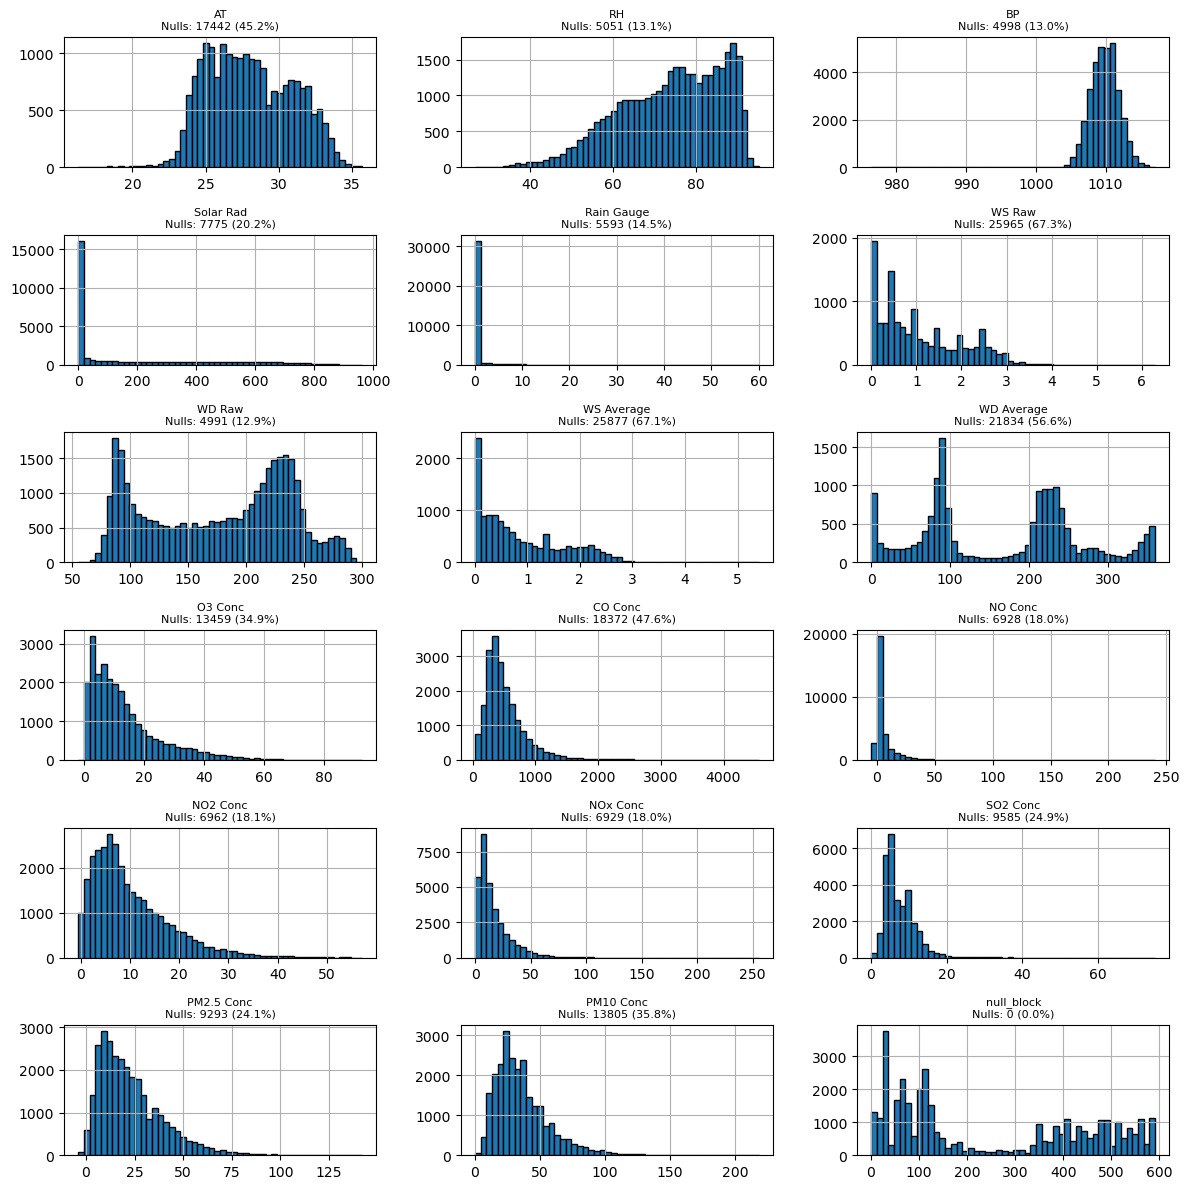

In [24]:
numeric_cols = [col for col in df_combined.columns if pd.api.types.is_numeric_dtype(df_combined[col])]

n_cols = 3 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten() 

for i, col in enumerate(numeric_cols):
    df_combined[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_combined[col].isna().sum()} ({df_combined[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

There is a large gap of the data missing showing on the belows graph. It is not actual data missing it happened because we removed the large gap from 2021-07 to 2022-10. So what this graph does is continue the time correctly but there is no data in that period. It connects the last data point with a line

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12896\3663450081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


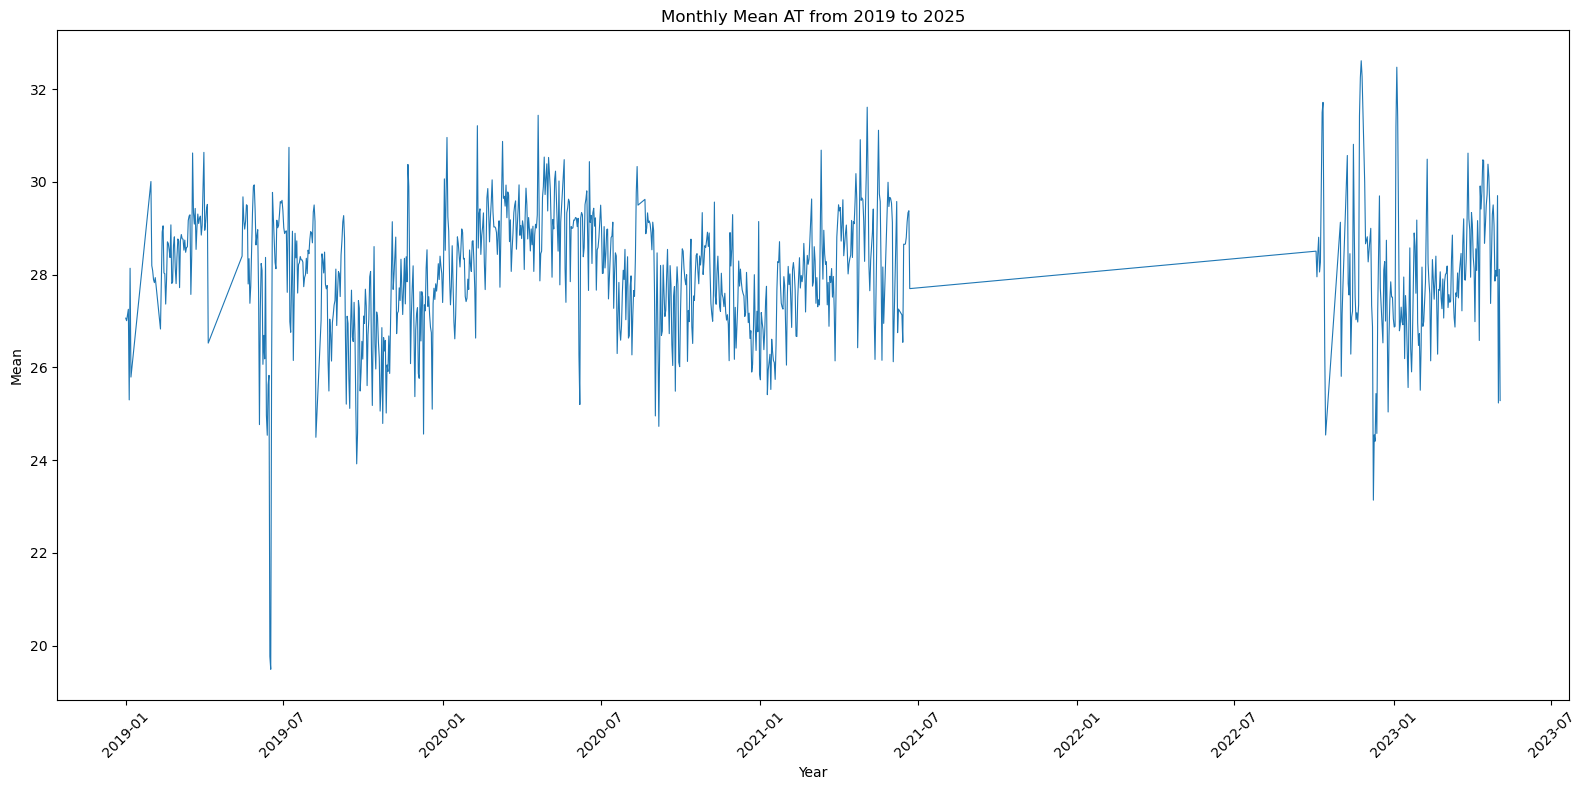

In [25]:
df_o3_time = df_combined[['Period Start Time','AT']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['AT'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='AT', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean AT from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dropping the large null value columns

Columns to drop
- WS Raw
- CO Conc
- WS Average
- WD Average
 * Also the null block column we don't need that anymore
 * We dont need Period End Time we can see that time stamp using Period Start Time

In [98]:
df_combined2 = df_combined.drop(['WS Raw', 'WS Average', 'WD Average', 'CO Conc', 'null_block', 'Period End Time'], axis=1)

In [99]:
df_combined3 = df_combined2.reset_index(drop=True)
df_combined3

,Period Start Time,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
0,2019-01-01 00:00:00,24.9,72.74,1014.7,0.25,0.0,165.8,34.19,0.35,6.23,6.58,14.25,25.0,41.0
1,2019-01-01 01:00:00,24.4,74.36,1014.2,0.26,0.0,179.7,36.08,0.14,3.71,3.85,5.26,21.0,35.0
2,2019-01-01 02:00:00,24.2,75.32,1013.7,0.25,0.0,197.1,36.22,NaN,NaN,NaN,NaN,15.0,31.0
3,2019-01-01 03:00:00,24.2,74.25,1013.3,0.25,0.0,190.1,36.96,0.10,2.06,2.16,2.85,19.0,29.0
4,2019-01-01 04:00:00,24.0,73.47,1013.0,0.25,0.0,167.5,37.39,0.26,1.95,2.20,2.86,18.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38561,2024-12-31 19:00:00,NaN,86.14,1010.6,NaN,1.0,141.4,4.94,14.83,16.68,31.51,3.84,29.0,NaN
38562,2024-12-31 20:00:00,NaN,87.52,1011.3,NaN,0.0,121.2,1.43,19.79,16.35,36.14,3.53,50.0,NaN
38563,2024-12-31 21:00:00,NaN,86.71,1012.0,NaN,0.0,154.6,1.07,22.06,16.95,39.01,3.44,59.0,NaN
38564,2024-12-31 22:00:00,NaN,80.01,1011.9,NaN,0.0,175.5,1.75,19.97,12.61,32.58,3.34,41.0,NaN


In [100]:
df_combined3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38566 entries, 0 to 38565
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  38566 non-null  datetime64[ns]
 1   AT                 21124 non-null  float64       
 2   RH                 33515 non-null  float64       
 3   BP                 33568 non-null  float64       
 4   Solar Rad          30791 non-null  float64       
 5   Rain Gauge         32973 non-null  float64       
 6   WD Raw             33575 non-null  float64       
 7   O3 Conc            25107 non-null  float64       
 8   NO Conc            31638 non-null  float64       
 9   NO2 Conc           31604 non-null  float64       
 10  NOx Conc           31637 non-null  float64       
 11  SO2 Conc           28981 non-null  float64       
 12  PM2.5 Conc         29273 non-null  float64       
 13  PM10 Conc          24761 non-null  float64       
dtypes: dat

### Null Map

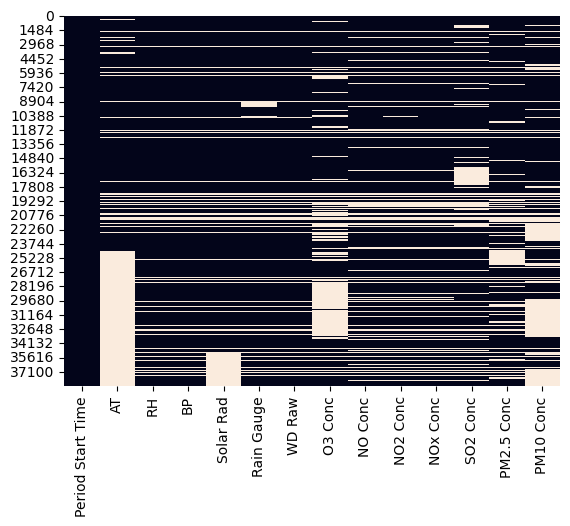

In [101]:
sns.heatmap(df_combined3.isnull(), cbar=False)
plt.show()

### Correlation heatmap

In [102]:
corr_columns = ['AT', 'RH', 'BP', 'Solar Rad',
       'Rain Gauge', 'WD Raw', 'O3 Conc', 'NO Conc', 'NO2 Conc',
       'NOx Conc', 'SO2 Conc', 'PM2.5 Conc', 'PM10 Conc']
corr_df = df_combined3[corr_columns]

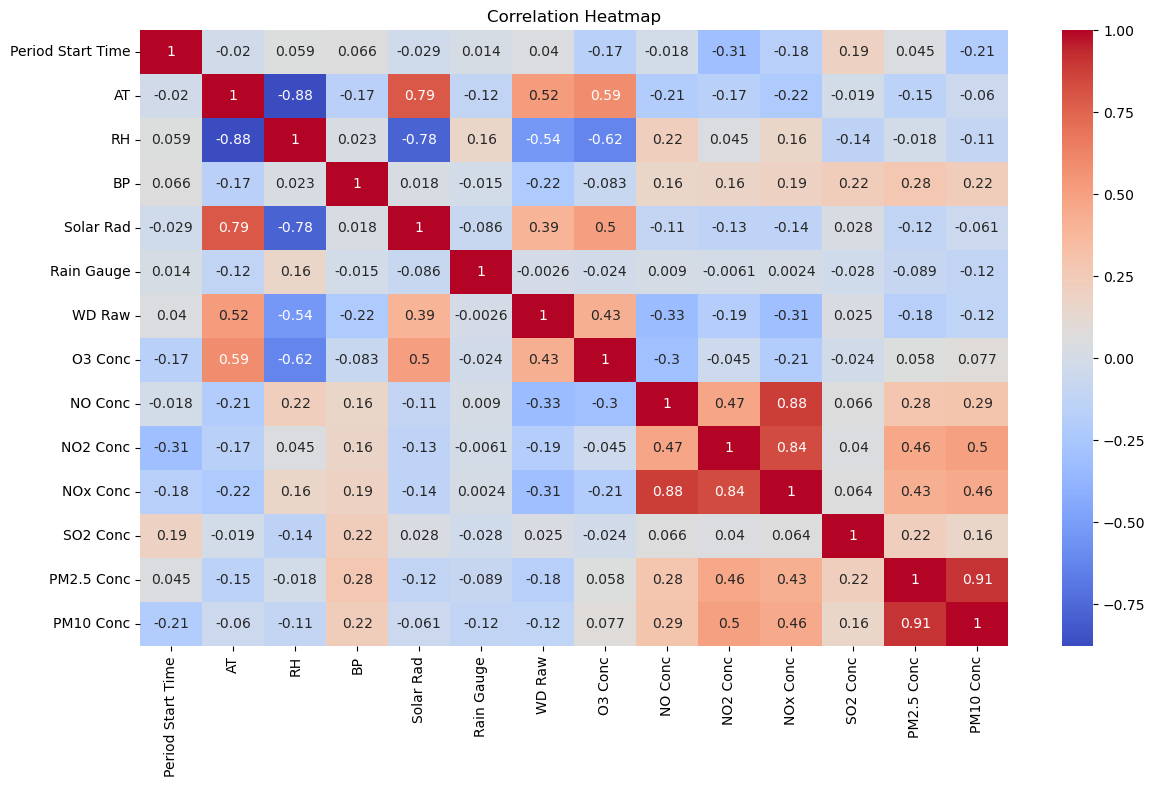

In [103]:
corr = df_combined3.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Null threatment

### Fowardfill Method

* Fill the small gaps with time forward fill.
* This is only possible because usually data (pollutant and weather) do not change within the same close hours. Likely the same as the hour before.
* There for we can fill the small gap with 3 hour limit.

In [104]:
df_filled = df_combined3.ffill(limit=3)

In [105]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38566 entries, 0 to 38565
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  38566 non-null  datetime64[ns]
 1   AT                 21624 non-null  float64       
 2   RH                 34290 non-null  float64       
 3   BP                 34329 non-null  float64       
 4   Solar Rad          31484 non-null  float64       
 5   Rain Gauge         33728 non-null  float64       
 6   WD Raw             34337 non-null  float64       
 7   O3 Conc            26952 non-null  float64       
 8   NO Conc            33850 non-null  float64       
 9   NO2 Conc           33814 non-null  float64       
 10  NOx Conc           33850 non-null  float64       
 11  SO2 Conc           31253 non-null  float64       
 12  PM2.5 Conc         30602 non-null  float64       
 13  PM10 Conc          25740 non-null  float64       
dtypes: dat

<function matplotlib.pyplot.show(close=None, block=None)>

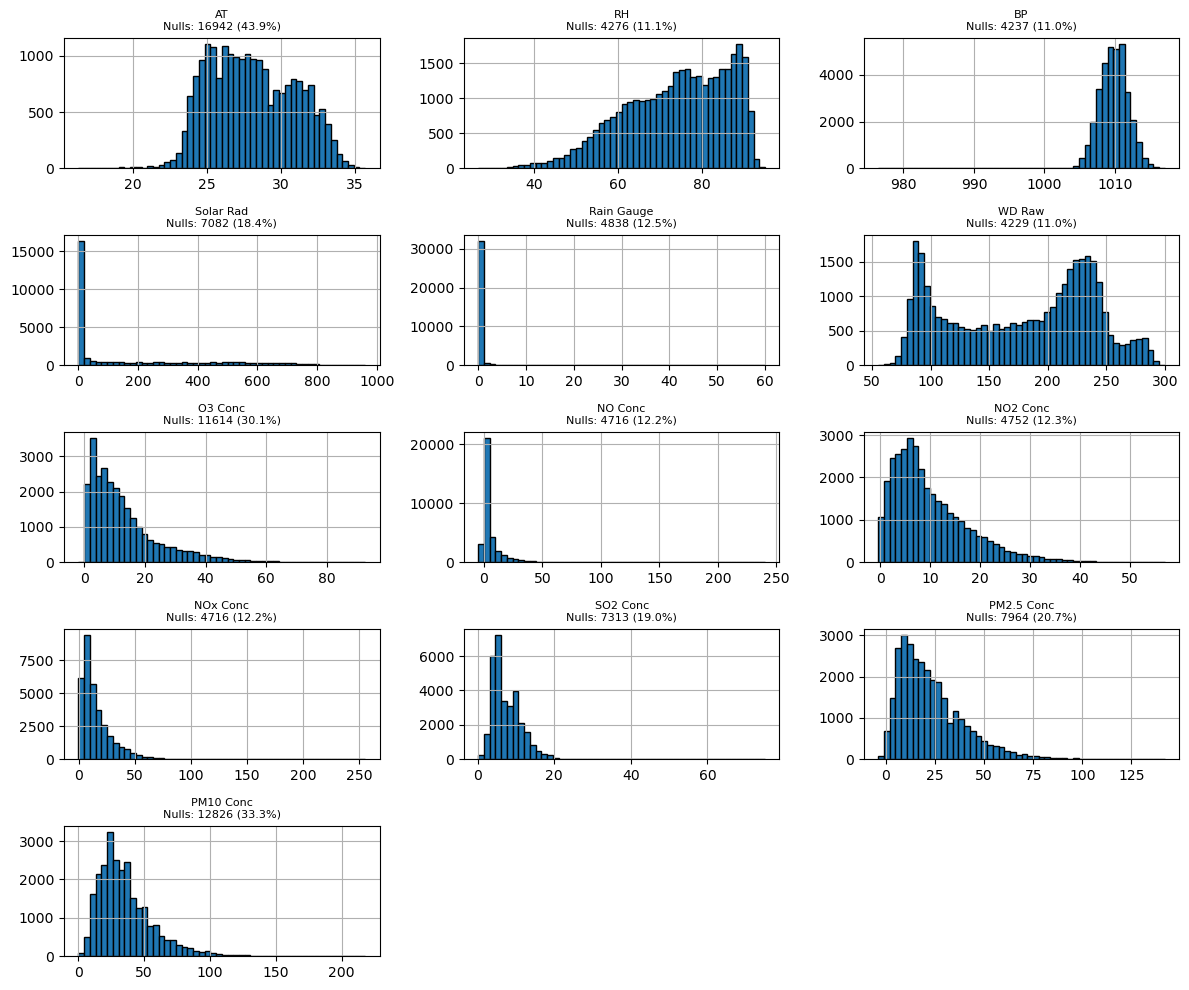

In [106]:
numeric_cols = [col for col in df_filled.columns if pd.api.types.is_numeric_dtype(df_filled[col])]

n_cols = 3 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten() 

for i, col in enumerate(numeric_cols):
    df_filled[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_filled[col].isna().sum()} ({df_filled[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

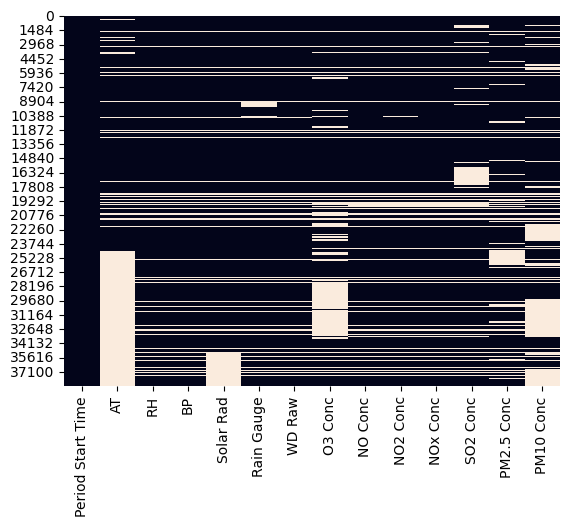

In [107]:
sns.heatmap(df_filled.isnull(), cbar=False)
plt.show()

### Interpolate using Time

After filling the tiny gaps, you'll still have larger ones. For many of your variables, a simple time-based interpolation is the best and most honest way to fill them.

* Method: Linear or Time Interpolation

* Why: It assumes a smooth, gradual change between two known points (e.g., the temperature didn't teleport; it rose or fell steadily). This is a very strong assumption for environmental data.

* Action: Apply this to your standard meteorological variables that are less complexly related to others.

In [108]:
if df_filled.index.name != 'Period Start Time':
    df_filled = df_filled.set_index('Period Start Time')

In [109]:
cols_to_interpolate = ['RH', 'BP', 'Solar Rad', 'Rain Gauge', 'WD Raw']
df_filled[cols_to_interpolate] = df_filled[cols_to_interpolate].interpolate(method='time')

In [110]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38566 entries, 2019-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AT          21624 non-null  float64
 1   RH          38566 non-null  float64
 2   BP          38566 non-null  float64
 3   Solar Rad   38566 non-null  float64
 4   Rain Gauge  38566 non-null  float64
 5   WD Raw      38566 non-null  float64
 6   O3 Conc     26952 non-null  float64
 7   NO Conc     33850 non-null  float64
 8   NO2 Conc    33814 non-null  float64
 9   NOx Conc    33850 non-null  float64
 10  SO2 Conc    31253 non-null  float64
 11  PM2.5 Conc  30602 non-null  float64
 12  PM10 Conc   25740 non-null  float64
dtypes: float64(13)
memory usage: 4.1 MB


In [111]:
df_filled

,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
Period Start Time,,,,,,,,,,,,,
2019-01-01 00:00:00,24.9,72.74,1014.7,0.25,0.0,165.8,34.19,0.35,6.23,6.58,14.25,25.0,41.0
2019-01-01 01:00:00,24.4,74.36,1014.2,0.26,0.0,179.7,36.08,0.14,3.71,3.85,5.26,21.0,35.0
2019-01-01 02:00:00,24.2,75.32,1013.7,0.25,0.0,197.1,36.22,0.14,3.71,3.85,5.26,15.0,31.0
2019-01-01 03:00:00,24.2,74.25,1013.3,0.25,0.0,190.1,36.96,0.10,2.06,2.16,2.85,19.0,29.0
2019-01-01 04:00:00,24.0,73.47,1013.0,0.25,0.0,167.5,37.39,0.26,1.95,2.20,2.86,18.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,NaN,86.14,1010.6,0.57,1.0,141.4,4.94,14.83,16.68,31.51,3.84,29.0,NaN
2024-12-31 20:00:00,NaN,87.52,1011.3,0.57,0.0,121.2,1.43,19.79,16.35,36.14,3.53,50.0,NaN
2024-12-31 21:00:00,NaN,86.71,1012.0,0.57,0.0,154.6,1.07,22.06,16.95,39.01,3.44,59.0,NaN


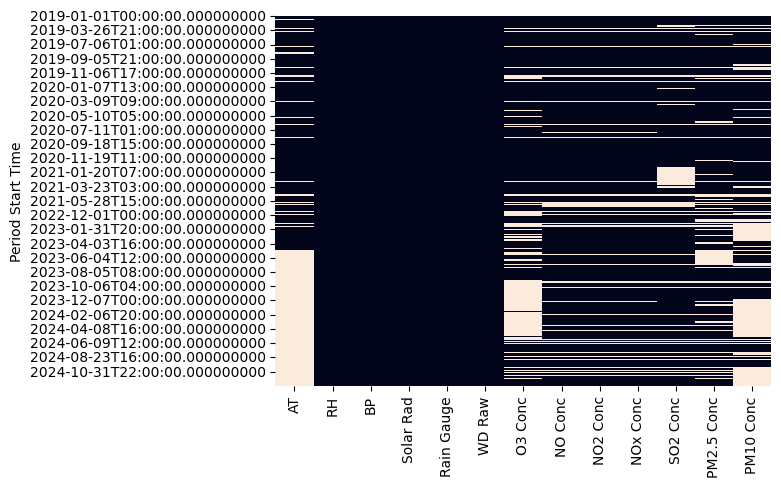

In [112]:
sns.heatmap(df_filled.isnull(), cbar=False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

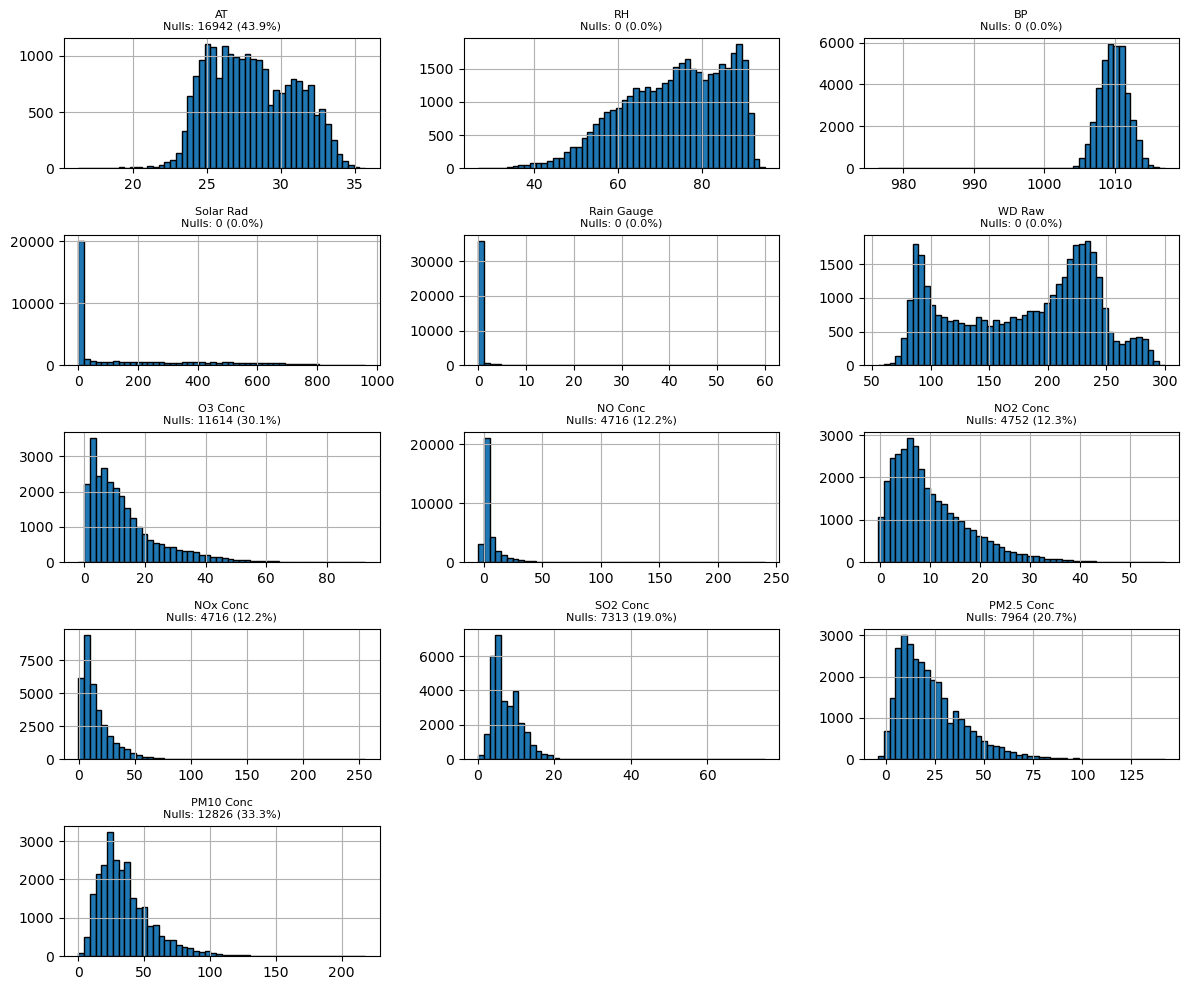

In [119]:
numeric_cols = [col for col in df_filled.columns if pd.api.types.is_numeric_dtype(df_filled[col])]

n_cols = 3 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten() 

for i, col in enumerate(numeric_cols):
    df_filled[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_filled[col].isna().sum()} ({df_filled[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

### Multivariate Imputation

* These are the columns that have large missing blocks (AT, O3, PM2.5, PM10) or are highly correlated with that block (Solar Rad, NO, NO2, NOx, SO2).
* We will use IterativeImputer (MICE) to build a model that uses all these columns to predict and fill the gaps in each other. This will capture the complex relationships shown in the heatmap (like AT vs. RH, PM2.5 vs. PM10, and O3 vs. Solar Rad)

In [134]:
complex_cols = [
    'AT',
    'Solar Rad',
    'O3 Conc',
    'NO Conc',
    'NO2 Conc',
    'NOx Conc',
    'SO2 Conc',
    'PM2.5 Conc',
    'PM10 Conc'
]

In [127]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
df_filled[complex_cols] = imputer.fit_transform(df_filled[complex_cols])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [128]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38566 entries, 2019-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AT          38566 non-null  float64
 1   RH          38566 non-null  float64
 2   BP          38566 non-null  float64
 3   Solar Rad   38566 non-null  float64
 4   Rain Gauge  38566 non-null  float64
 5   WD Raw      38566 non-null  float64
 6   O3 Conc     38566 non-null  float64
 7   NO Conc     38566 non-null  float64
 8   NO2 Conc    38566 non-null  float64
 9   NOx Conc    38566 non-null  float64
 10  SO2 Conc    38566 non-null  float64
 11  PM2.5 Conc  38566 non-null  float64
 12  PM10 Conc   38566 non-null  float64
dtypes: float64(13)
memory usage: 4.1 MB


In [130]:
df_filled.isnull().sum()

AT            0
RH            0
BP            0
Solar Rad     0
Rain Gauge    0
WD Raw        0
O3 Conc       0
NO Conc       0
NO2 Conc      0
NOx Conc      0
SO2 Conc      0
PM2.5 Conc    0
PM10 Conc     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

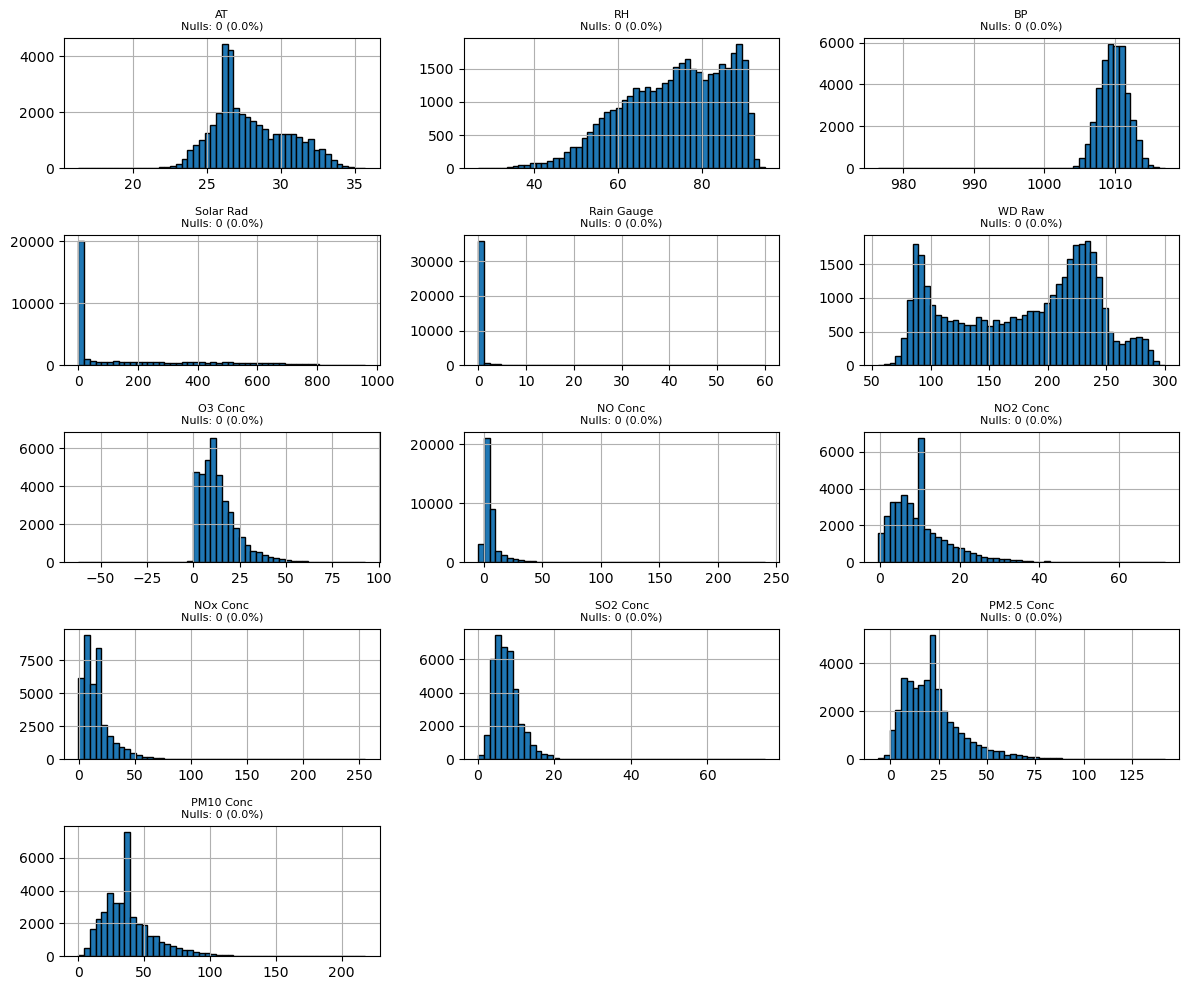

In [131]:
numeric_cols = [col for col in df_filled.columns if pd.api.types.is_numeric_dtype(df_filled[col])]

n_cols = 3 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten() 

for i, col in enumerate(numeric_cols):
    df_filled[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_filled[col].isna().sum()} ({df_filled[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

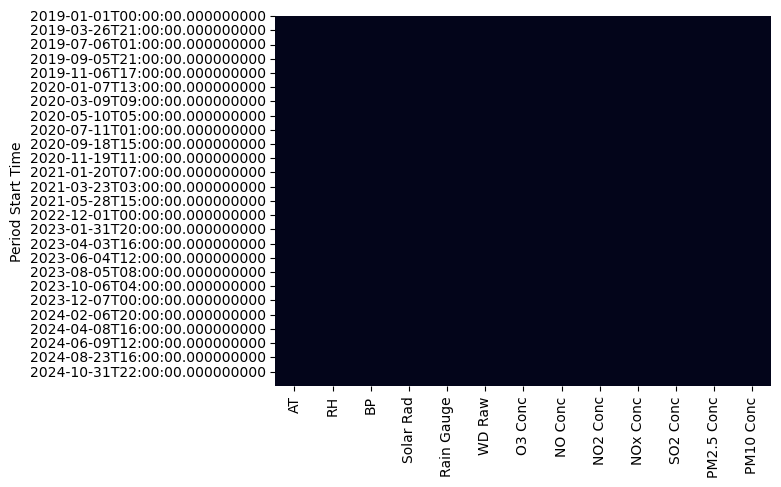

In [132]:
sns.heatmap(df_filled.isnull(), cbar=False)
plt.show()

In [133]:
df_filled.describe()

,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000
mean,27.870966,73.421003,1009.824222,171.853472,0.664731,179.075905,13.441895,5.484313,10.040352,15.524065,7.622553,22.339131,38.661739
std,2.504165,12.207456,1.982322,236.346641,3.598528,59.708532,10.582636,8.408076,7.314198,13.497049,3.879881,15.826891,20.835416
min,16.300000,26.780000,976.400000,0.000000,0.000000,55.100000,-61.978018,-4.790000,-0.450000,-0.400000,0.150000,-6.199851,0.000000
25%,26.166756,64.510000,1008.400000,0.290000,0.000000,122.400000,6.100000,0.770000,4.870000,6.610000,5.080000,11.000000,24.968929
50%,27.262329,74.866377,1009.800000,9.000000,0.000000,191.800000,11.033274,3.030000,9.230000,13.020000,7.335355,20.263369,37.000000
75%,29.700000,83.810000,1011.200000,326.428690,0.000000,229.073877,18.052818,5.485562,12.877500,18.780000,9.260000,28.010066,46.142686
max,35.700000,95.040000,1017.100000,961.300000,60.000000,300.100000,92.640000,240.350000,71.598691,255.340000,75.040000,142.000000,218.000000


In [135]:
df_filled.to_csv("Baththaramulla_data_cleaned.csv")

In [82]:
df_ffill = df_combined2.ffill()

In [83]:
df_ffill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38566 entries, 0 to 41639
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  38566 non-null  datetime64[ns]
 1   Period End Time    38566 non-null  datetime64[ns]
 2   AT                 38566 non-null  float64       
 3   RH                 38566 non-null  float64       
 4   BP                 38566 non-null  float64       
 5   Solar Rad          38566 non-null  float64       
 6   Rain Gauge         38566 non-null  float64       
 7   WD Raw             38566 non-null  float64       
 8   O3 Conc            38566 non-null  float64       
 9   NO Conc            38566 non-null  float64       
 10  NO2 Conc           38566 non-null  float64       
 11  NOx Conc           38566 non-null  float64       
 12  SO2 Conc           38566 non-null  float64       
 13  PM2.5 Conc         38566 non-null  float64       
 14  PM10 Conc  

In [84]:
df_ffill.isnull().sum()

Period Start Time    0
Period End Time      0
AT                   0
RH                   0
BP                   0
Solar Rad            0
Rain Gauge           0
WD Raw               0
O3 Conc              0
NO Conc              0
NO2 Conc             0
NOx Conc             0
SO2 Conc             0
PM2.5 Conc           0
PM10 Conc            0
dtype: int64

In [85]:
df_ffill.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,38566,38566,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000
mean,2022-01-15 02:31:13.218280704,2022-01-15 03:31:13.183633408,26.875136,73.713751,1009.767741,162.222703,0.899601,179.585544,11.178338,5.454577,9.977776,15.440682,7.709909,22.594747,34.158507
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,55.100000,-1.930000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-04-09 02:15:00,2020-04-09 03:15:00,24.900000,64.540000,1008.400000,0.280000,0.000000,121.300000,2.320000,0.660000,4.340000,6.090000,4.720000,11.000000,22.000000
50%,2021-05-23 13:30:00,2021-05-23 14:30:00,25.300000,75.185000,1009.700000,3.655000,0.000000,192.600000,7.210000,2.230000,7.720000,10.960000,6.510000,18.000000,30.000000
75%,2023-11-05 11:45:00,2023-11-05 12:45:00,28.800000,84.487500,1011.200000,301.212500,0.000000,230.100000,15.350000,6.240000,14.010000,20.657500,9.630000,30.000000,40.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,300.100000,92.640000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.795661,12.490387,2.015435,235.358617,5.010950,60.746666,11.888186,8.768009,7.718401,14.148371,4.271467,16.791387,19.968441


In [87]:
df_combined2.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,38566,38566,21124.000000,33515.000000,33568.000000,30791.000000,32973.000000,33575.000000,25107.000000,31638.000000,31604.000000,31637.000000,28981.000000,29273.000000,24761.000000
mean,2022-01-15 02:31:13.218280704,2022-01-15 03:31:13.183633408,28.022401,73.932897,1009.850003,177.343337,0.350499,176.827026,13.360517,5.596364,10.127867,15.723119,7.528441,23.062481,36.132709
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,55.100000,-1.930000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-04-09 02:15:00,2020-04-09 03:15:00,25.700000,65.030000,1008.500000,0.280000,0.000000,115.150000,4.640000,0.650000,4.370000,6.070000,4.650000,10.000000,21.000000
50%,2021-05-23 13:30:00,2021-05-23 14:30:00,27.800000,75.530000,1009.800000,8.420000,0.000000,189.000000,9.930000,2.160000,7.940000,11.030000,6.250000,19.000000,31.000000
75%,2023-11-05 11:45:00,2023-11-05 12:45:00,30.400000,84.360000,1011.200000,342.825000,0.000000,229.100000,17.890000,6.130000,14.110000,20.990000,9.680000,32.000000,45.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,300.100000,92.640000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.866367,12.246013,1.986292,244.890616,2.301753,61.215875,11.966432,9.095636,7.872557,14.577447,4.224653,17.174139,21.756105


<function matplotlib.pyplot.show(close=None, block=None)>

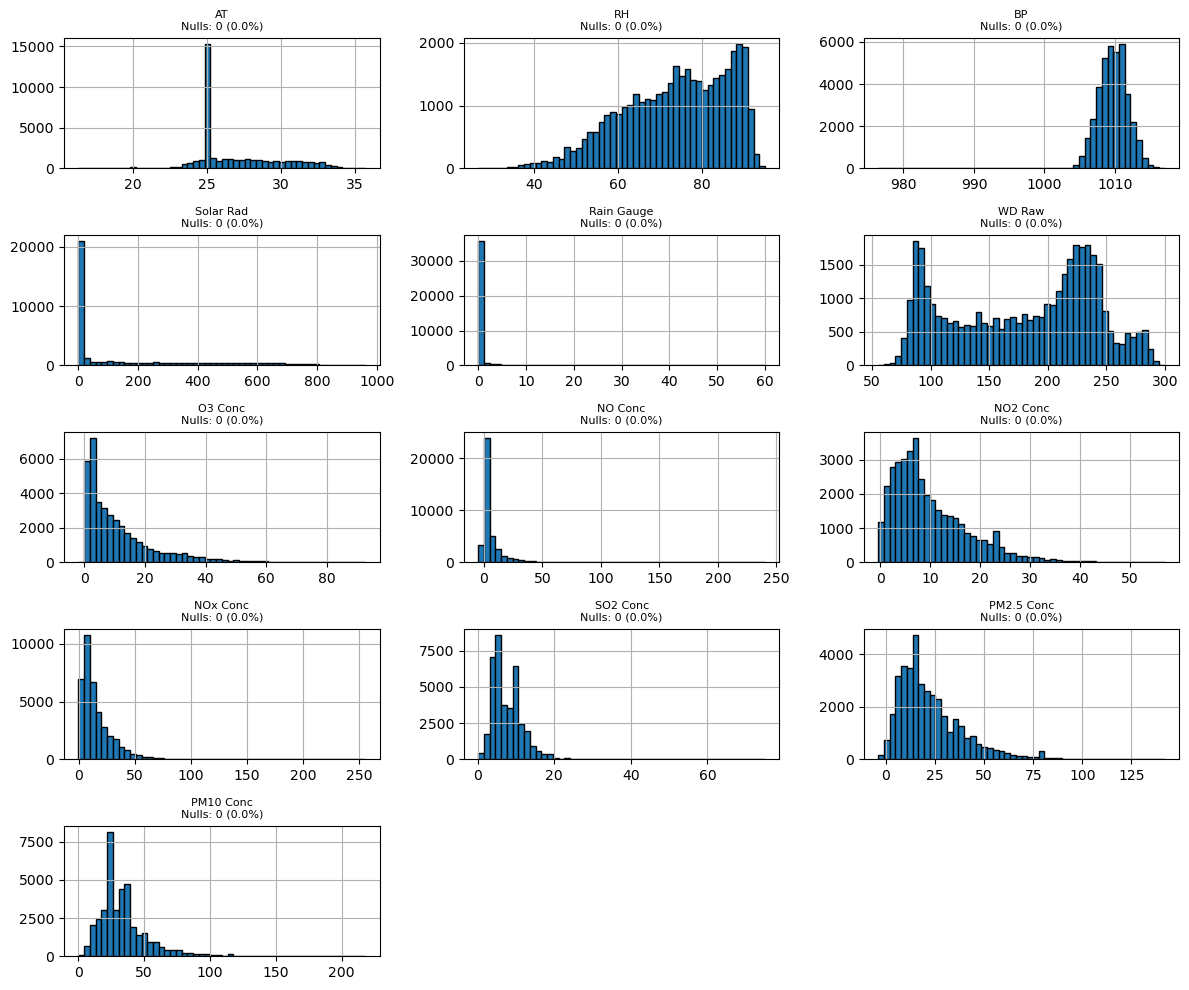

In [88]:
numeric_cols = [col for col in df_ffill.columns if pd.api.types.is_numeric_dtype(df_ffill[col])]

# Layout setup
n_cols = 3   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten()  # make it 1D for easy iteration

for i, col in enumerate(numeric_cols):
    df_ffill[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_ffill[col].isna().sum()} ({df_ffill[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10084\3130717314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


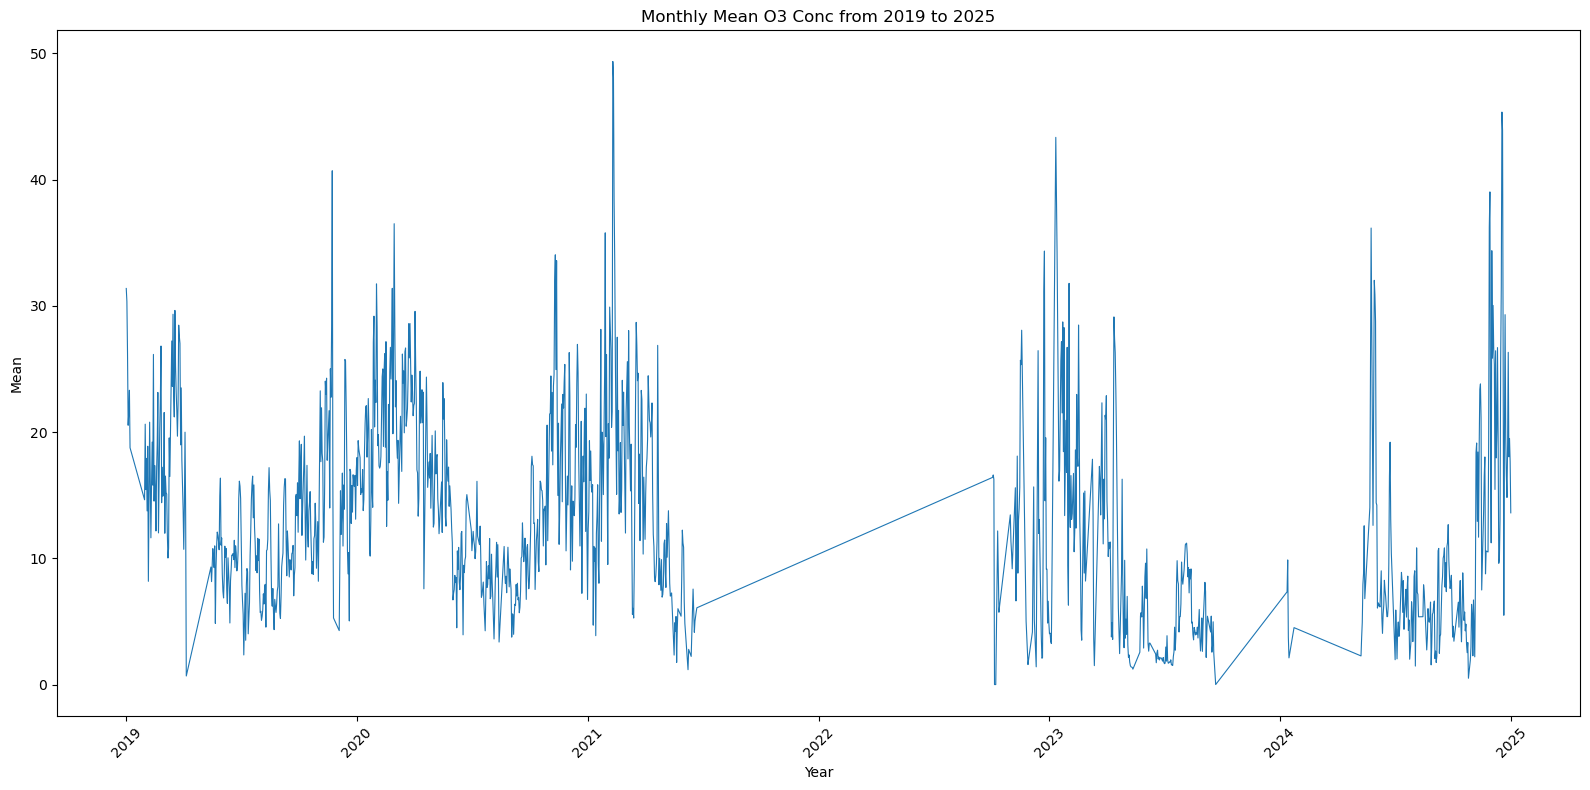

In [89]:
df_o3_time = df_combined2[['Period Start Time','O3 Conc']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['O3 Conc'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='O3 Conc', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean O3 Conc from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10084\133919131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


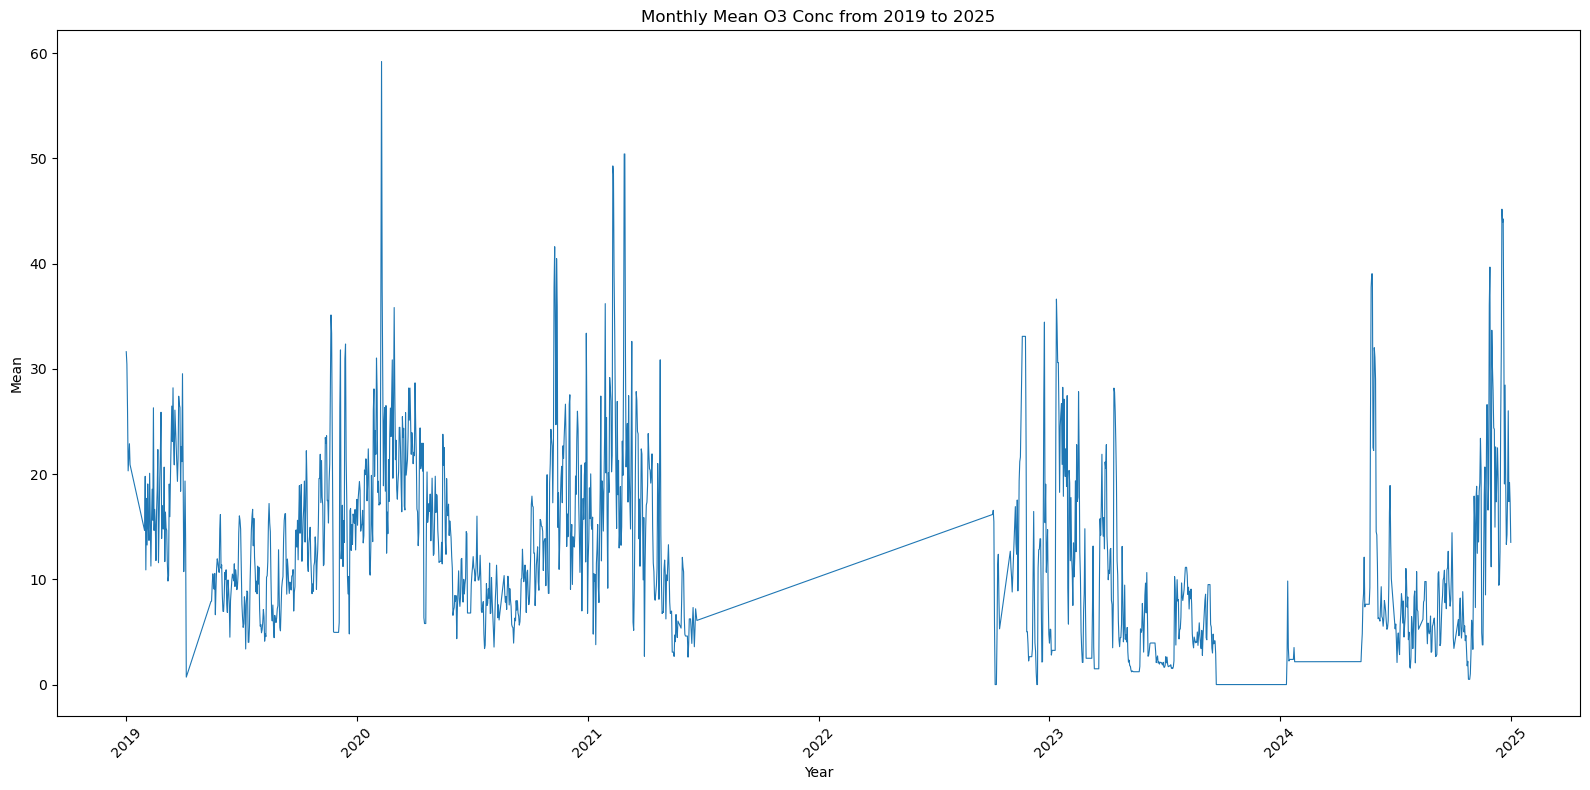

In [90]:
df_o3_time = df_ffill[['Period Start Time','O3 Conc']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['O3 Conc'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='O3 Conc', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean O3 Conc from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
df_bfill = df_combined2.bfill()

In [92]:
df_bfill.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38566 entries, 0 to 41639
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Period Start Time  38566 non-null  datetime64[ns]
 1   Period End Time    38566 non-null  datetime64[ns]
 2   AT                 24455 non-null  float64       
 3   RH                 38566 non-null  float64       
 4   BP                 38566 non-null  float64       
 5   Solar Rad          35056 non-null  float64       
 6   Rain Gauge         38566 non-null  float64       
 7   WD Raw             38566 non-null  float64       
 8   O3 Conc            38566 non-null  float64       
 9   NO Conc            38566 non-null  float64       
 10  NO2 Conc           38566 non-null  float64       
 11  NOx Conc           38566 non-null  float64       
 12  SO2 Conc           38566 non-null  float64       
 13  PM2.5 Conc         38566 non-null  float64       
 14  PM10 Conc  

In [93]:
df_bfill.describe()

,Period Start Time,Period End Time,AT,RH,BP,Solar Rad,Rain Gauge,WD Raw,O3 Conc,NO Conc,NO2 Conc,NOx Conc,SO2 Conc,PM2.5 Conc,PM10 Conc
count,38566,38566,24455.000000,38566.000000,38566.000000,35056.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,38566.000000,36772.000000
mean,2022-01-15 02:31:13.218280704,2022-01-15 03:31:13.183633408,28.216553,73.086170,1009.896139,201.760480,0.369880,178.500529,13.330148,5.576931,10.467982,16.068255,7.329859,20.479464,33.413630
min,2019-01-01 00:00:00,2019-01-01 01:00:00,16.300000,26.780000,976.400000,0.000000,0.000000,55.100000,-1.930000,-4.790000,-0.450000,-0.400000,0.150000,-4.000000,0.000000
25%,2020-04-09 02:15:00,2020-04-09 03:15:00,25.800000,63.660000,1008.500000,0.280000,0.000000,120.200000,3.600000,0.640000,4.580000,6.240000,4.570000,8.000000,21.000000
50%,2021-05-23 13:30:00,2021-05-23 14:30:00,28.100000,74.420000,1009.900000,40.365000,0.000000,191.400000,10.260000,2.210000,8.320000,11.340000,6.050000,17.000000,29.000000
75%,2023-11-05 11:45:00,2023-11-05 12:45:00,30.700000,83.790000,1011.300000,398.760000,0.000000,228.600000,19.950000,6.230000,14.510000,21.230000,9.610000,28.000000,40.000000
max,2024-12-31 23:00:00,2025-01-01 00:00:00,35.700000,95.040000,1017.100000,961.300000,60.000000,300.100000,92.640000,240.350000,57.080000,255.340000,75.040000,142.000000,218.000000
std,NaN,NaN,2.928196,12.373967,2.008200,252.352241,2.347953,60.115885,11.639124,9.095014,8.263519,15.064920,4.249337,16.658010,20.613227


<function matplotlib.pyplot.show(close=None, block=None)>

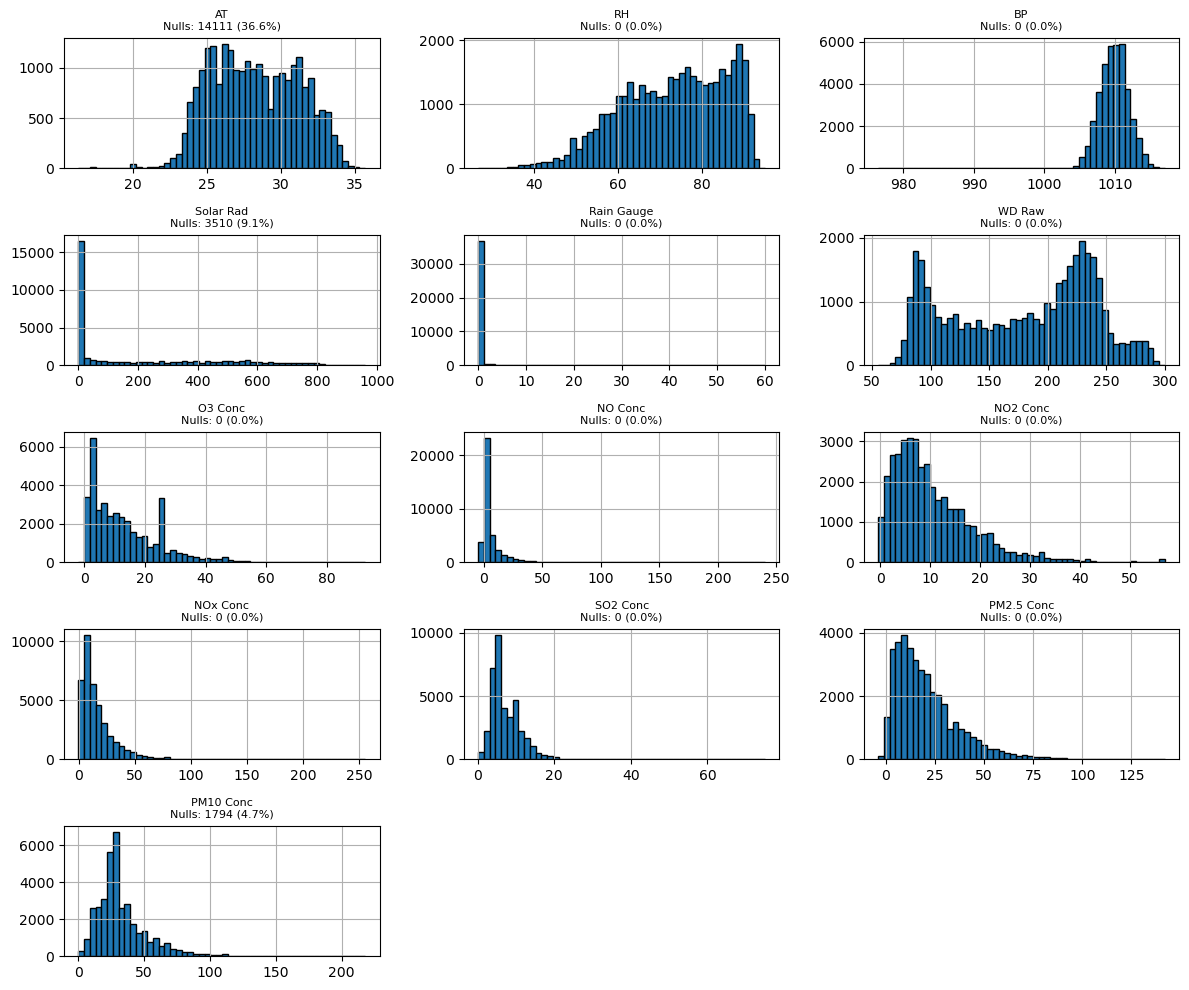

In [94]:
numeric_cols = [col for col in df_bfill.columns if pd.api.types.is_numeric_dtype(df_bfill[col])]

# Layout setup
n_cols = 3   # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2))
axes = axes.flatten()  # make it 1D for easy iteration

for i, col in enumerate(numeric_cols):
    df_bfill[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f"{col}\nNulls: {df_bfill[col].isna().sum()} ({df_bfill[col].isna().mean()*100:.1f}%)", fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10084\876254517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date


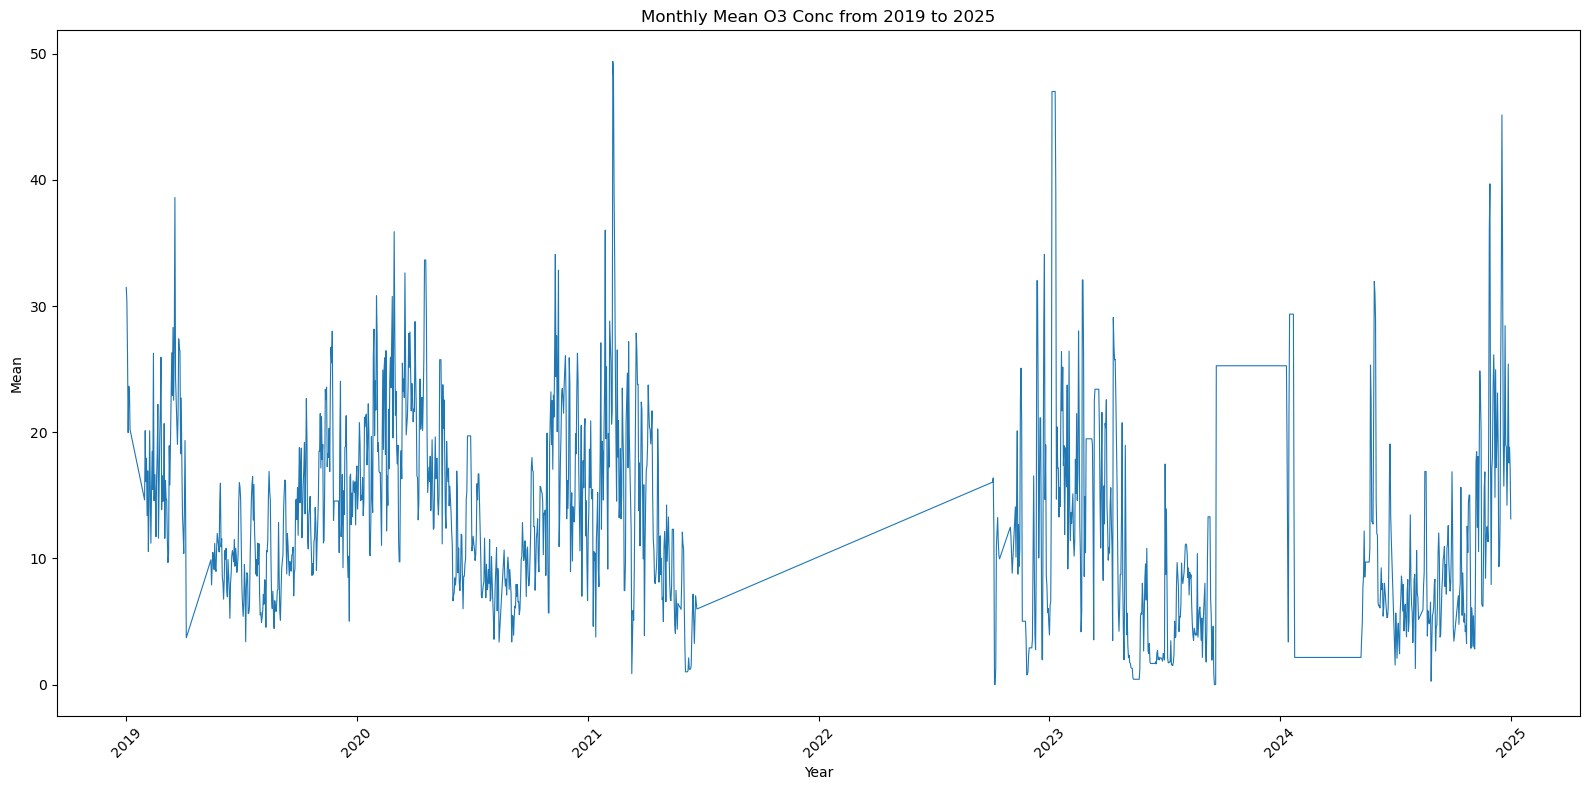

In [95]:
df_o3_time = df_bfill[['Period Start Time','O3 Conc']]

df_o3_time['Date'] = df_o3_time['Period Start Time'].dt.date

df_filtered = df_o3_time[(df_o3_time['Period Start Time'].dt.year >= 2019) &
                         (df_o3_time['Period Start Time'].dt.year <= 2024)]

daily_at = df_filtered.groupby('Date')['O3 Conc'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.lineplot(x='Date', y='O3 Conc', data=daily_at, linewidth=0.8)
plt.title('Monthly Mean O3 Conc from 2019 to 2025')
plt.xlabel('Year')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
df = df_combined2